# This notebook contains regression using Neural Network

In [1]:
from data_loader import DataLoader
from neuralnetwork import create_nn_regressor
from configurations import args
from base_regressor_plot import BaseRegressorPlot
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


## Notes
Read data from data_loader and the cleaning and encoding is that module
The neural_network has the module details

## Read Data
Read split ready to use data

In [2]:
data_loader = DataLoader(args)

In [3]:
# Analysis showed these features are impactful
categorical_features = ['MSSubClass', 'MSZoning', 'LotShape',
                        'LandContour', 'LotConfig', 'LandSlope', 
                        'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'Heating',
                        'HeatingQC']
nominal_features = ['PoolArea', 'YearRemodAdd', 
                    'MasVnrArea', 'YearBuilt', 'KitchenAbvGr',
                     'GrLivArea', 'OverallQual',
                      'BedroomAbvGr', 'TotalBsmtSF', 'LotArea', 
                      'OverallCond',]

## Helper methods

## Model

In [4]:
# nn_regressorr = create_nn_regressor(norm_X_train, norm_X_test, y_test, args.num_epochs)

In [5]:
norm_X_train, norm_X_test, y_train, y_test = data_loader.prep_verify_data_for_nn(
    categorical_features, nominal_features)

Before dropping NA (1460, 26)
After dropping NA (1452, 26), dropped 8
Before dropping NA (1452, 26)
removing: PosA 1
removing: RRAn 1
removing: RRAe 1
removing: Shed 1
removing: Floor 1
removing: Po 1
Before dropping NA (1446, 26), dropped 6


Resuming from saved model


2021-12-09 20:44:00.234334: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-09 20:44:00.234742: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 20:44:00.241980: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-12-09 20:44:00.367815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-09 20:44:00.368436: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3601000000 Hz


Training...........................................

plot_predicted_vs_actual


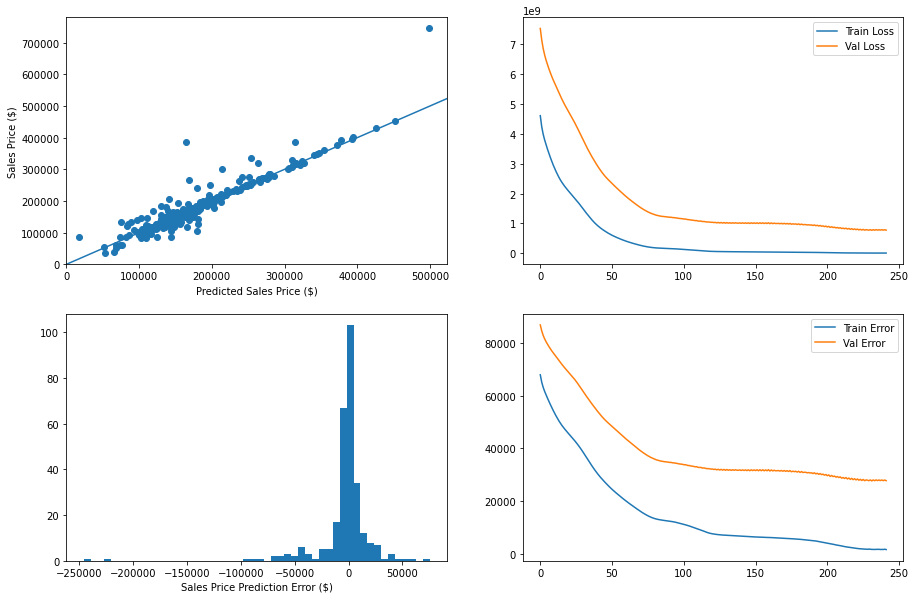

In [6]:
def analyze_neuralnet_regression(X_train, X_test, y_train, y_test):
    regressor = create_nn_regressor(
        X_train, X_test, y_test, epochs=args.num_epochs)
    regressor.fit(X_train, y_train)
    predicted = regressor.get_predicted(X_test)
    print("\n")

    # #plot model summary as table

    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0][0], predicted, y_test)
    BaseRegressorPlot.plot_history_loss(
        axes[0][1], regressor,  inlcule_val_loss=True)
    BaseRegressorPlot.plot_error_hist(axes[1][0], predicted, y_test)
    BaseRegressorPlot.plot_rmse(axes[1][1], regressor, inlcule_val_loss=True)
    return regressor


nn_regressor = analyze_neuralnet_regression(
    norm_X_train, norm_X_test, y_train, y_test)
